# Sports player project
* by: Sondre Fossen-Romsaas

In this project I've downloaded 1000 pictures of players in 10 different sports. The goal is to train a model to predict which sport each player are parisipating in. I'm using the fast.ai library to complete this project, and I'm using what I've learned in Lesson 1 and 2 in their Deep Learning 1 2019 course.


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

## Downloading image urls

First you have to go to Google Images and search for the images you want to use. 

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> to open the javascript Console.

Type in:
```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Then the urls of the 100 first pictures is downloaded into you're Downloads folder in a .txt file


### Create your directory with data

Give a class name to your pictures

In [4]:
folder = 'soccer'
file = 'urls_soccer.txt'

In [5]:
folder = 'handball'
file = 'urls_handball.txt'

In [6]:
folder = 'basketball'
file = 'urls_basketball.txt'

In [7]:
folder = 'golf'
file = 'urls_golf.txt'

In [8]:
folder = 'chess'
file = 'urls_chess.txt'

In [9]:
folder = 'baseball'
file = 'urls_baseball.txt'

In [29]:
folder = 'football'
file = 'urls_football.txt'

In [32]:
folder = 'tennis'
file = 'urls_tennis.txt'

In [35]:
folder = 'curling'
file = 'urls_curling.txt'

In [38]:
folder = 'hockey'
file = 'urls_hockey.txt'

You need to run this for each class:

In [39]:
path = Path('data/sport')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

You're directory should look something like this

In [19]:
path.ls()

[PosixPath('data/sport/urls_football.txt'),
 PosixPath('data/sport/golf'),
 PosixPath('data/sport/urls_hocky.txt'),
 PosixPath('data/sport/handball'),
 PosixPath('data/sport/soccer'),
 PosixPath('data/sport/urls_chess.txt'),
 PosixPath('data/sport/football'),
 PosixPath('data/sport/chess'),
 PosixPath('data/sport/hocky'),
 PosixPath('data/sport/urls_soccer.txt'),
 PosixPath('data/sport/urls_handball.txt'),
 PosixPath('data/sport/urls_golf.txt'),
 PosixPath('data/sport/models'),
 PosixPath('data/sport/urls_curling.txt'),
 PosixPath('data/sport/urls_basketball.txt'),
 PosixPath('data/sport/tennis'),
 PosixPath('data/sport/urls_baseball.txt'),
 PosixPath('data/sport/urls_tennis.txt'),
 PosixPath('data/sport/curling'),
 PosixPath('data/sport/baseball'),
 PosixPath('data/sport/basketball')]

## Downloading the images

Now its time to download the images from the urls

In [43]:
classes = ['soccer','handball','basketball', 'golf', 'chess', 'baseball', 'football', 'tennis', 'curling', 'hockey']

You also need to run this line for each class

In [41]:
download_images(path/file, dest, max_pics=200)

Error https://www.performancextra.com/wp-content/uploads/2013/03/MP900423138.jpg HTTPSConnectionPool(host='www.performancextra.com', port=443): Max retries exceeded with url: /wp-content/uploads/2013/03/MP900423138.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))


Delete alle the pictures that can't be opend

In [50]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=1000)

soccer


handball


basketball


golf


chess


baseball


football


tennis


curling


hockey


Image data/sport/hockey/00000058.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/sport/hockey/00000064.jpg'>
Image data/sport/hockey/00000040.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/sport/hockey/00000079.jpg'>
cannot identify image file <_io.BufferedReader name='data/sport/hockey/00000089.png'>
Image data/sport/hockey/00000086.jpg has 4 instead of 3 channels


## Making the model

First create a databunch

In [4]:
path = Path('data/sport')

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Show some examples of images

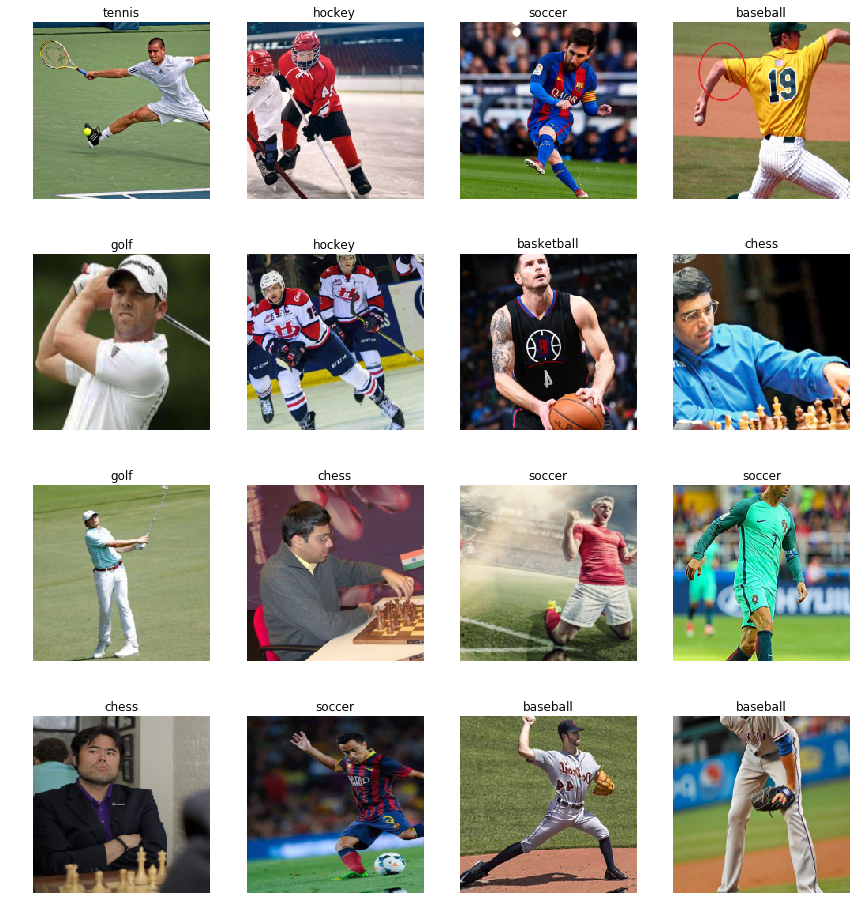

In [6]:
data.show_batch(rows=4, figsize=(12,13))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baseball',
  'basketball',
  'chess',
  'curling',
  'football',
  'golf',
  'handball',
  'hockey',
  'soccer',
  'tennis'],
 10,
 734,
 183)

## Resnet34

We're gonna train our model on the Resnet 34 architecture. 34 means that it is 34 layers in the convolutional neural network

In [28]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

trains the modell with 4 epochs (number of cycles through all youre data)

In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,2.339490,0.982581,0.229508
2,1.432514,0.334758,0.092896
3,0.987561,0.280968,0.092896
4,0.753556,0.279935,0.087432


In [30]:
learn.save('stage-1')

Unfreeze the model. Include optimizing all the weights in all the layers

In [31]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-04


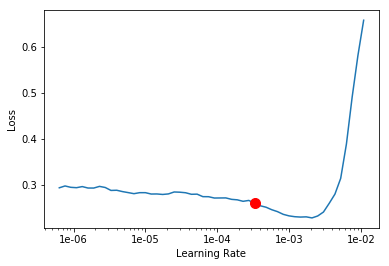

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.281712,0.228190,0.065574
2,0.231218,0.194760,0.060109


In [35]:
learn.save('stage-2')

## Looking at the result

In [36]:
interp = ClassificationInterpretation.from_learner(learn)

Plot confusion matrix

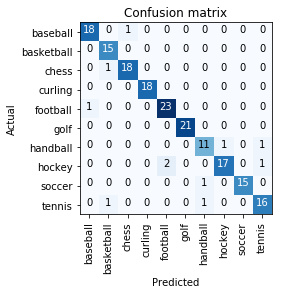

In [37]:
interp.plot_confusion_matrix()

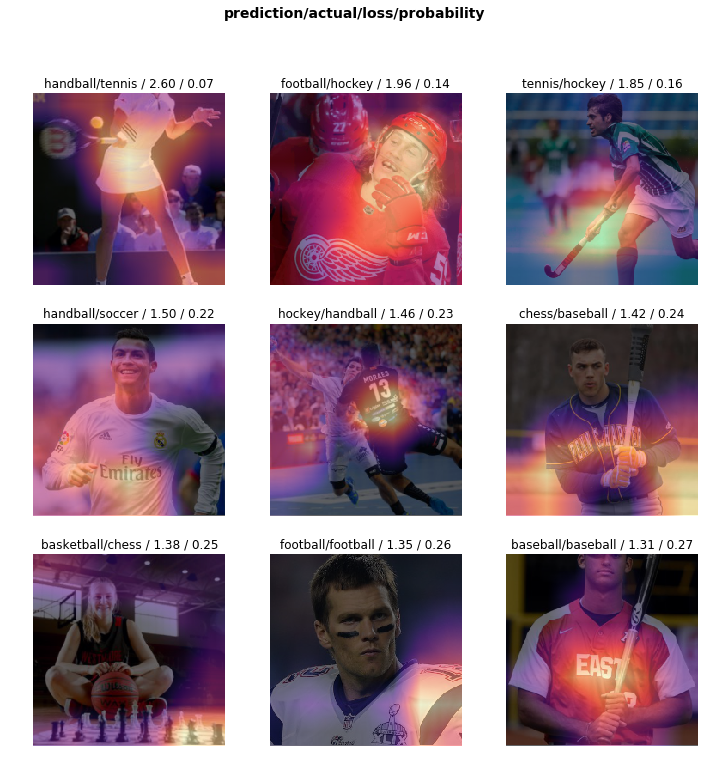

In [38]:
interp.plot_top_losses(9)

In [39]:
interp.most_confused()

[('hockey', 'football', 2),
 ('baseball', 'chess', 1),
 ('chess', 'basketball', 1),
 ('football', 'baseball', 1),
 ('handball', 'hockey', 1),
 ('handball', 'tennis', 1),
 ('hockey', 'tennis', 1),
 ('soccer', 'handball', 1),
 ('tennis', 'basketball', 1),
 ('tennis', 'handball', 1)]

We can see that this modell is pretty good with an error rate on only 3,8%. Is it possible to make it any better with a larger neural net?

## Cleaning Up

In [40]:
from fastai.widgets import *

In [44]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [45]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [46]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [48]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [55]:
path

PosixPath('data/sport')

In [56]:
df = pd.read_csv(path/'cleaned.csv')
df.head()

,name,label
0,golf/00000036.jpg,golf
1,golf/00000023.jpg,golf
2,golf/00000011.jpg,golf
3,golf/00000081.jpg,golf
4,golf/00000075.jpg,golf


In [60]:
tfms = get_transforms(do_flip=False)
data2 = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=224)

data/sport/cleaned.csv


## Resnet50

In [61]:
learn = create_cnn(data2, models.resnet50, metrics=error_rate)

In [62]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,2.110961,1.113738,0.287671
2,1.226748,0.304956,0.089041
3,0.832487,0.159632,0.061644
4,0.603469,0.122990,0.047945
5,0.466208,0.103888,0.020548
6,0.373922,0.098255,0.020548
7,0.312171,0.100288,0.027397
8,0.263035,0.102386,0.027397


In [63]:
learn.save('stage-1-50')

In [64]:
learn.unfreeze()

In [65]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


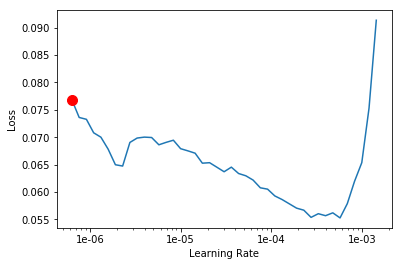

In [66]:
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.082695,0.101997,0.027397
2,0.071143,0.104032,0.020548
3,0.062023,0.100917,0.020548


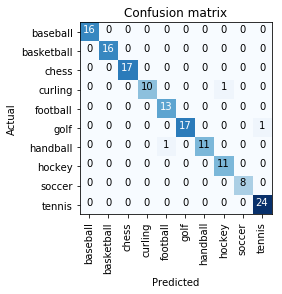

In [69]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()